# Anemia Prediction

## Importation

### Libraries

In [ ]:
# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn.preprocessing as skpp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset

#### **Data Dictionary**

* Sex: Male/Female

* Age: Age of each patient

* Key Hematological Parameters:

* Hemoglobin Level (Hb): Indicator of anemia severity

* Red Blood Cell (RBC) Count: Number of red blood cells per unit volume

* Packed Cell Volume (PCV): Percentage of blood volume occupied by red blood cells

* Mean Corpuscular Volume (MCV): Average volume of red blood cells

* Mean Corpuscular Hemoglobin (MCH): Average hemoglobin content per red blood cell

* Mean Corpuscular Hemoglobin Concentration (MCHC): Concentration of hemoglobin in a given volume of red blood cells

* Decision_Class: 1 diagnoses Anemia while 0 reflects no illness

In [ ]:
# Loading the data from .xlsx to Pandas

data = pd.read_excel('Anemia Dataset.xlsx')
data.head()

,Gender,Age,Hb,RBC,PCV,MCV,MCH,MCHC,Decision_Class
0,f,32,10.9,4.26,34.2,80.2,25.5,31.8,1
1,f,45,9.6,3.64,29.9,82.1,26.4,32.2,1
2,f,38,10.1,3.70,32.4,87.6,27.4,31.3,1
3,m,37,11.0,3.93,33.6,85.3,27.9,32.7,1
4,f,50,12.1,4.16,36.5,87.9,29.2,33.2,0


## Data Cleaning

In [ ]:
# To understand the overall width and height of the dataset

data.shape

(1000, 9)

In [ ]:
# To get more information from our dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1000 non-null   object 
 1   Age             1000 non-null   int64  
 2   Hb              1000 non-null   float64
 3   RBC             1000 non-null   float64
 4   PCV             1000 non-null   float64
 5   MCV             1000 non-null   float64
 6   MCH             1000 non-null   float64
 7   MCHC            1000 non-null   float64
 8   Decision_Class  1000 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 70.4+ KB


In [ ]:
# This command will give us the count of all missing values

data.isnull().sum()

,0
Gender,0
Age,0
Hb,0
RBC,0
PCV,0
MCV,0
MCH,0
MCHC,0
Decision_Class,0


In [ ]:
# This command will give us the count of all duplicated records

data.duplicated().sum()

np.int64(28)

In [ ]:
# Dropping duplicate records to improve data integrity and reduce sampling bias

data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [ ]:
# Checking if we did remove it

data.duplicated().sum()

np.int64(0)

In [ ]:
# To check our column names

data.columns

Index(['Gender', 'Age', 'Hb', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC',
       'Decision_Class'],
      dtype='object')

In [ ]:
# To have a column where the Int Decision_Class is stated in String, we use the following

data['Outcome_label'] = data['Decision_Class'].map({
    0: 'without anemia',
    1: 'with anemia'
})
data.head()

,Gender,Age,Hb,RBC,PCV,MCV,MCH,MCHC,Decision_Class,Outcome_label
0,f,32,10.9,4.26,34.2,80.2,25.5,31.8,1,with anemia
1,f,45,9.6,3.64,29.9,82.1,26.4,32.2,1,with anemia
2,f,38,10.1,3.70,32.4,87.6,27.4,31.3,1,with anemia
3,m,37,11.0,3.93,33.6,85.3,27.9,32.7,1,with anemia
4,f,50,12.1,4.16,36.5,87.9,29.2,33.2,0,without anemia


In [ ]:
# Because we need numerical data for our model
# We need to add another column that returns 1 for male and 0 for female per record

mapping = {'male': 1, 'm': 1, 'female': 0, 'f': 0}

data['Gender_int'] = (
    data['Gender']
      .astype(str)
      .str.strip()
      .str.lower()
      .map(mapping)
      .astype('Int64')
)
data.head()

,Gender,Age,Hb,RBC,PCV,MCV,MCH,MCHC,Decision_Class,Outcome_label,Gender_int
0,f,32,10.9,4.26,34.2,80.2,25.5,31.8,1,with anemia,0
1,f,45,9.6,3.64,29.9,82.1,26.4,32.2,1,with anemia,0
2,f,38,10.1,3.70,32.4,87.6,27.4,31.3,1,with anemia,0
3,m,37,11.0,3.93,33.6,85.3,27.9,32.7,1,with anemia,1
4,f,50,12.1,4.16,36.5,87.9,29.2,33.2,0,without anemia,0


## Data Analysis

In [ ]:
data.head(10)

,Gender,Age,Hb,RBC,PCV,MCV,MCH,MCHC,Decision_Class,Outcome_label,Gender_int
0,f,32,10.9,4.26,34.2,80.2,25.5,31.8,1,with anemia,0
1,f,45,9.6,3.64,29.9,82.1,26.4,32.2,1,with anemia,0
2,f,38,10.1,3.70,32.4,87.6,27.4,31.3,1,with anemia,0
3,m,37,11.0,3.93,33.6,85.3,27.9,32.7,1,with anemia,1
4,f,50,12.1,4.16,36.5,87.9,29.2,33.2,0,without anemia,0
5,f,40,10.4,3.59,30.4,84.5,27.7,32.7,1,with anemia,0
6,f,32,6.8,1.99,15.4,77.4,24.0,31.0,1,with anemia,0
7,m,18,11.6,4.06,35.5,87.4,28.6,32.8,1,with anemia,1
8,m,38,12.0,4.38,36.3,82.8,27.5,33.2,0,without anemia,1
9,f,50,11.7,4.35,36.6,84.0,26.9,32.0,1,with anemia,0


In [ ]:
# To recheck our dataset size after cleaning the dataset

data.shape

(972, 11)

In [ ]:
# To see the statistical measurements for our data again, now that it has been cleaned now
# Only the numerical data will be seen here
# The data we have that will benefit from being described will be continuous numerical data

round(data.describe(), 3)

,Age,Hb,RBC,PCV,MCV,MCH,MCHC,Decision_Class,Gender_int
count,972.000,972.000,972.000,972.000,972.000,972.000,972.000,972.000,972.0
mean,40.919,11.566,4.134,32.662,79.224,28.136,35.415,0.641,0.329
std,16.034,1.346,0.600,4.899,7.810,3.351,1.423,0.480,0.47
min,18.000,5.500,1.470,10.600,29.600,13.300,25.300,0.000,0.0
25%,28.000,10.800,3.770,29.800,75.200,26.300,34.900,0.000,0.0
50%,38.000,11.600,4.110,32.800,80.700,28.700,35.700,1.000,0.0
75%,51.250,12.200,4.470,35.725,84.500,30.400,36.300,1.000,1.0
max,96.000,15.800,7.410,49.500,104.900,37.900,38.100,1.000,1.0


The mean age of the patients is 40.919 or 41. Further inspection of the dataset revealed that the minimum age is 18. Therefore, the researchers changed the scope of the study from Pediatric Anemia to Anemia.

The description also stated that more than 2 out of 3 patients in the dataset are diagnosed with Anemia.

## Data Visualization

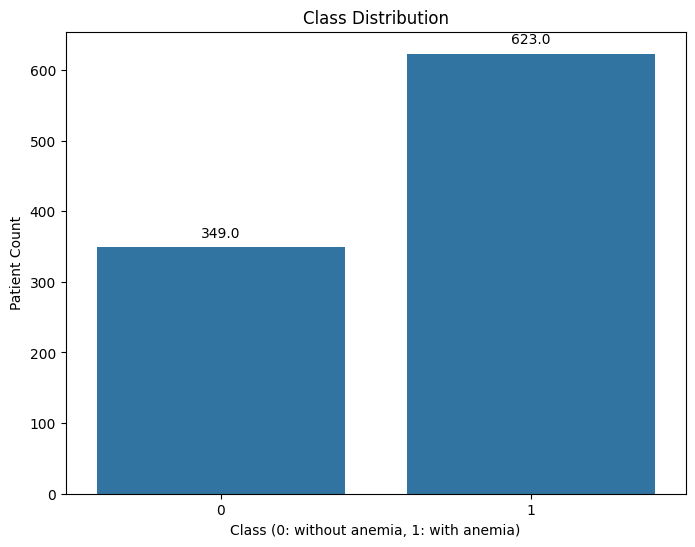

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Decision_Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class (0: without anemia, 1: with anemia)')
plt.ylabel('Patient Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
print("Percentage of people with anemia: " + str(round((623/972)*100, 0)) + "%")
print("Percentage of people without anemia: " + str(round((349/972)*100, 0)) + "%")

Percentage of people with anemia: 64.0%
Percentage of people without anemia: 36.0%


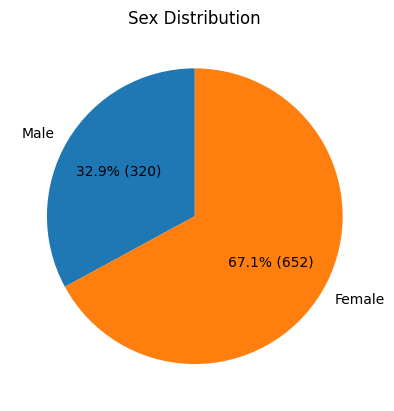

In [ ]:
gender_counts = data['Gender'].value_counts()
male_count = gender_counts.get('m', 0)
female_count = gender_counts.get('f', 0)

labels = ['Male', 'Female']
sizes = [male_count, female_count]

plt.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(sizes) / 100), startangle=90)
plt.title('Sex Distribution')
plt.show()

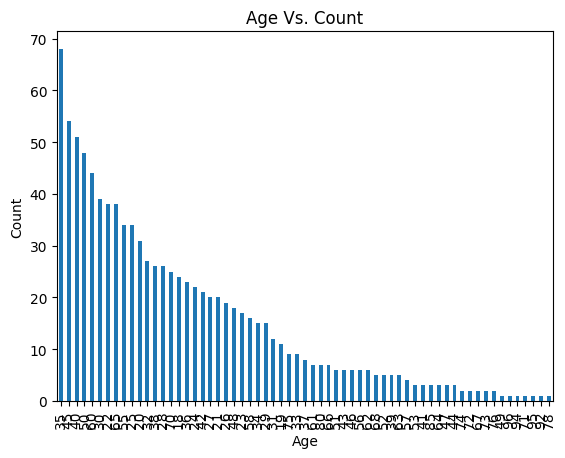

In [ ]:
age_counts = data['Age'].value_counts()
age_counts.plot(kind='bar',
                     xlabel='Age',
                     ylabel='Count',
                     title='Age Vs. Count')
plt.show()

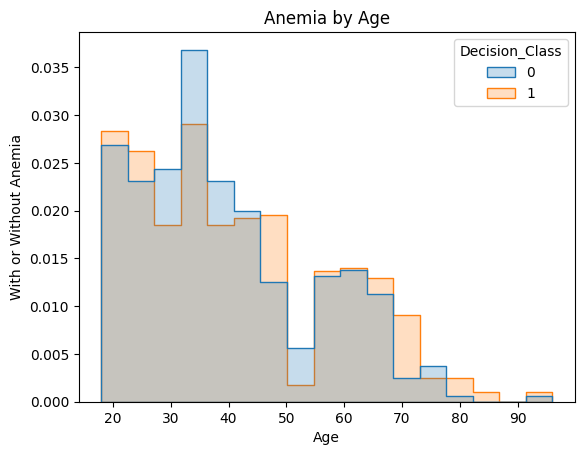

In [ ]:
sns.histplot(data=data, x='Age', hue='Decision_Class', element='step', stat='density', common_norm=False)

plt.title('Anemia by Age')
plt.xlabel('Age')
plt.ylabel('With or Without Anemia')
plt.show()

## Machine Learning

### Model Training

In [ ]:
# Feature Selection
X = data[['Gender_int', 'Age',	'Hb', 'RBC',	'PCV',	'MCV',	'MCH', 'MCHC']]
y = data['Decision_Class']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Training
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)


LogisticRegression(random_state=0)

### Model Prediction

In [ ]:
pred = print(log.predict(X_test))

[0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0
 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1
 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0
 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1]


In [ ]:
print(y_test)

963    0
288    1
14     1
709    1
481    1
      ..
516    1
19     1
443    0
526    1
197    1
Name: Decision_Class, Length: 195, dtype: int64


In [ ]:
# 'Gender_int', 'Age',	'Hb', 'RBC',	'PCV',	'MCV',	'MCH', 'MCHC'
# In this code block we inputted data that is not in the records
# This block also serves as the main code block for future developers to base the prediction module on

res = log.predict([[0, 45, 10.1, 3.93, 36.5, 84.5, 24, 32.8]])

if res == 0:
    print('Without Anemia')
else:
    print('With Anemia')

With Anemia


In [ ]:
data.head()

,Gender,Age,Hb,RBC,PCV,MCV,MCH,MCHC,Decision_Class,Outcome_label,Gender_int
0,f,32,10.9,4.26,34.2,80.2,25.5,31.8,1,with anemia,0
1,f,45,9.6,3.64,29.9,82.1,26.4,32.2,1,with anemia,0
2,f,38,10.1,3.70,32.4,87.6,27.4,31.3,1,with anemia,0
3,m,37,11.0,3.93,33.6,85.3,27.9,32.7,1,with anemia,1
4,f,50,12.1,4.16,36.5,87.9,29.2,33.2,0,without anemia,0


In [ ]:
# 'Gender_int', 'Age',	'Hb', 'RBC',	'PCV',	'MCV',	'MCH', 'MCHC'
# To ensure our code is correct, in this code block
# We gave the model a previous record from our dataset to see if it returns the same outcome
# It in fact, did

res = log.predict([[0, 32,	10.9,	4.26,	34.2,	80.2,	25.5,	31.8]])

if res == 0:
    print('Without Anemia')
else:
    print('With Anemia')

With Anemia


### Model Testing

In [ ]:
# Here lies the five evaluation metrics used to test the reliability of the system

y_pred = log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9897435897435898
Confusion Matrix:
 [[ 76   0]
 [  2 117]]
Precision: 1.0
Recall: 0.9831932773109243
F1 Score: 0.9915254237288136


**Testing Observation**

Accuracy Score

The accuracy score of the model is approximately 0.99. This means that the model correctly predicted the class (with anemia or without anemia) for about 99% of the patient records in the test dataset.

Confusion Matrix
Confusion Matrix - The confusion matrix provides a more detailed breakdown of the model's performance.

* True Negatives (TN): 76 patients were correctly predicted as without anemia.

* False Positives (FP): 0 patients were incorrectly predicted as with anemia when they actually do not have anemia.

* False Negatives (FN): 2 patients were incorrectly predicted as without anemia when they actually have anemia.

* True Positives (TP): 117 patients were correctly predicted as with anemia.

Precision

The precision score of the model is 1. This measures how many of the positive predictions a model makes that are actually correct.

Recall

The recall score of the model is approximately 0.98. This means that out of all the actual cases, the model correctly identified about 98% of them.

F1-score

The F1-score of the model is approximately 0.99. This is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.

**Conclusion**

The researchers successful created a logistic regression model that correctly predicts whether or not a patient is suffering from Anemia or not. The researchers tested it using 5 testing metrics listed above.